In [1]:
#importing  various libraries for Model
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting



In [35]:
#loading data set
df=pd.read_csv("cleaned_data.csv")


In [36]:
#showing first 5 rows of our dataset
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [37]:
#get info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       522 non-null    float64
 1   TM      522 non-null    float64
 2   Tm      522 non-null    float64
 3   H       522 non-null    float64
 4   PP      522 non-null    float64
 5   VV      522 non-null    float64
 6   V       522 non-null    float64
 7   VM      522 non-null    float64
 8   PM_2_5  522 non-null    float64
dtypes: float64(9)
memory usage: 36.8 KB


In [38]:
#checking how many NAN values are present in Respective Coloumn in dataset
df.isna().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM_2_5    0
dtype: int64

In [39]:
#dropping all NAN values 
df.dropna(inplace=True)

In [40]:
#checking how many NAN values are present in Respective Coloumn in dataset after dropping NAN values -> 0
df.isna().sum()


T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM_2_5    0
dtype: int64

In [87]:
#seprate object for target feature
y=df["TM"]

#seprate object for input feature
x=df.drop("TM",axis=1)

In [88]:
x.columns

Index(['T', 'Tm', 'H', 'PP', 'VV', 'V', 'VM', 'PM_2_5'], dtype='object')

In [89]:
x.head()    #indepent variable

,T,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [90]:
y.head() #depedent variable

0    30.3
1    30.3
2    31.8
3    30.2
4    30.6
Name: TM, dtype: float64

In [91]:
#importing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)    #80% training

In [92]:
#imporing Linear Regression Model 

from sklearn.linear_model import LinearRegression

In [93]:
regression=LinearRegression()

In [94]:
y_train


397    35.0
20     32.2
165    27.0
52     36.2
505    27.5
       ... 
348    29.2
211    33.1
502    24.6
196    31.6
175    26.4
Name: TM, Length: 417, dtype: float64

In [95]:
x_train

,T,Tm,H,PP,VV,V,VM,PM_2_5
397,28.1,23.0,54.0,0.00,6.9,4.1,9.4,53.125000
20,24.6,21.0,63.0,0.51,5.5,3.9,9.4,93.375000
165,22.3,18.6,71.0,0.00,6.3,3.5,5.4,121.333333
52,27.7,21.4,42.0,0.00,6.9,3.5,3.5,84.500000
505,21.4,17.5,66.0,0.00,6.9,0.2,1.9,157.500000
...,...,...,...,...,...,...,...,...
348,22.1,18.7,76.0,0.00,6.0,1.3,3.5,113.875000
211,25.6,17.1,31.0,0.00,6.9,3.1,5.4,174.937500
502,21.7,19.5,90.0,14.48,4.0,1.9,3.5,207.833333
196,24.7,20.2,63.0,0.00,6.3,2.2,5.4,143.000000


In [96]:
#fitting variables into the model(Linear Regression)
regression.fit(x_train,y_train)

LinearRegression()

In [97]:
y_pred=regression.predict(x_test)

In [98]:
#checking error 
from sklearn import metrics
print("Mean Absolute Error on Test Data of Linear Regression:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error on Test Data of Linear Regression:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error on Test Data of Linear Regression:",metrics.mean_squared_error(y_test,y_pred))



Mean Absolute Error on Test Data of Linear Regression: 0.608078041624743
Mean Squared Error on Test Data of Linear Regression: 0.6395583183054845
Root Mean Squared Error on Test Data of Linear Regression: 0.6395583183054845


In [99]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Variance':y_test-y_pred})
df1.head(10)

,Actual,Predicted,Variance
520,28.2,28.369686,-0.169686
517,28.4,28.304580,0.095420
354,27.1,27.450186,-0.350186
244,33.9,32.202762,1.697238
318,27.6,27.714393,-0.114393
474,29.4,30.494729,-1.094729
65,32.1,32.552558,-0.452558
3,30.2,29.809037,0.390963
313,27.5,26.976104,0.523896
115,26.7,28.207565,-1.507565


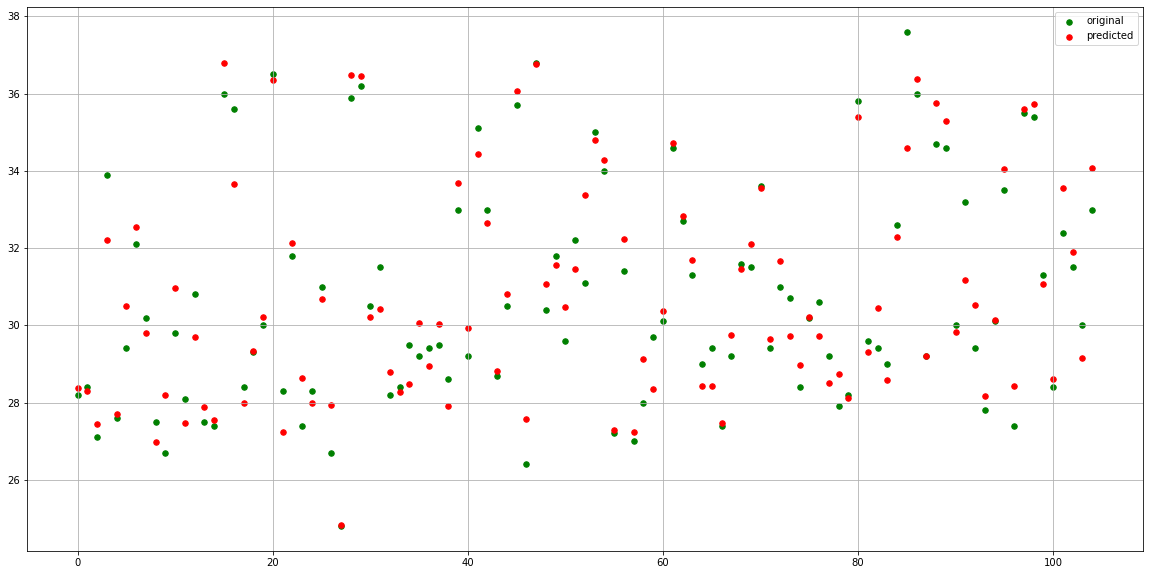

In [100]:
fig,ax=plt.subplots(figsize=(20,10))
x_ax=range(len(x_test))
plt.scatter(x_ax,y_test,s=30,color="green",label="original")
plt.scatter(x_ax,y_pred,s=30,color="red",label="predicted")
plt.legend()
plt.grid()
plt.show()

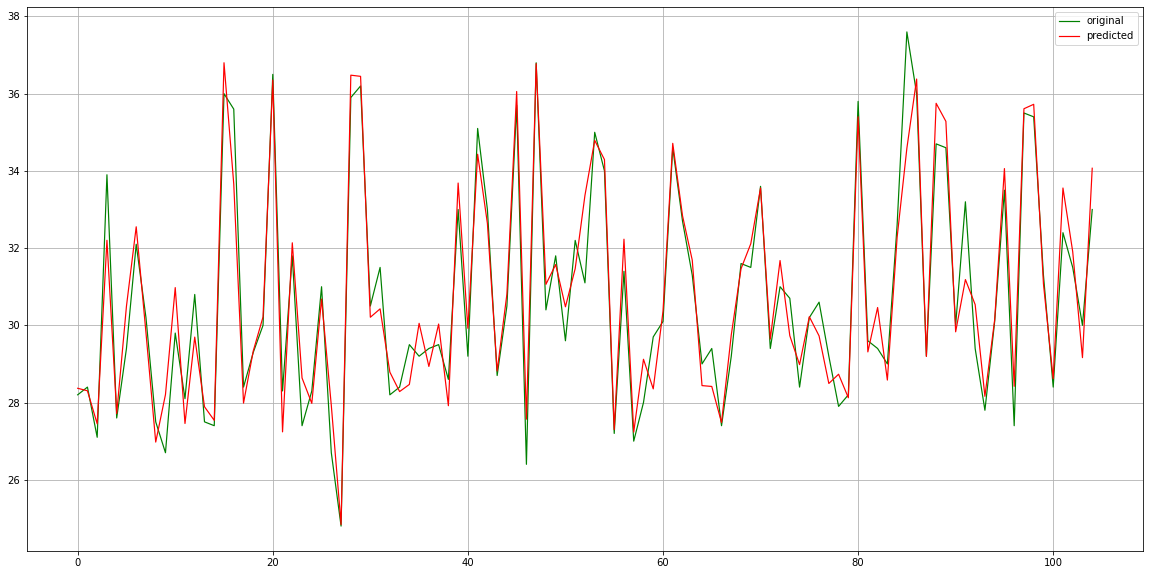

In [101]:
fig,ax=plt.subplots(figsize=(20,10))
x_ax=range(len(x_test))
plt.plot(x_ax,y_test,lw=1.2,color="green",label="original")
plt.plot(x_ax,y_pred,lw=1.2,color="red",label="predicted")
plt.legend()
plt.grid()
plt.show()

In [102]:
#train score of Regression Model
train_score=round(regression.score(x_train,y_train)*100,2)
print("Train score of LINEAR REGRESSION: ",train_score)
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred)*100,2)
print("r_2 score:",score)
print("Linear Regression Score:",regression.score(x_train,y_train))

Train score of LINEAR REGRESSION:  86.39
r_2 score: 92.1
Linear Regression Score: 0.8638921256929206


In [103]:
#2nd Algorithm -> Lasso
#importing 
from sklearn.linear_model import Lasso

In [104]:
Lasso=Lasso()

In [105]:
#fitting variables into the model(Linear Regression)
Lasso.fit(x_train,y_train)

Lasso()

In [106]:
y_pred=Lasso.predict(x_test)

In [107]:
#checking error 
from sklearn import metrics
print("Mean Absolute Error on Test Data of Lasso Regression:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error on Test Data of Lasso Regression:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error on Test Data of Lasso Regression:",metrics.mean_squared_error(y_test,y_pred))


Mean Absolute Error on Test Data of Lasso Regression: 0.772392195205112
Mean Squared Error on Test Data of Lasso Regression: 1.0617554308211081
Root Mean Squared Error on Test Data of Lasso Regression: 1.0617554308211081


In [108]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Variance':y_test-y_pred})
df1.head(10)

,Actual,Predicted,Variance
520,28.2,28.720926,-0.520926
517,28.4,28.206082,0.193918
354,27.1,28.101844,-1.001844
244,33.9,31.278019,2.621981
318,27.6,28.198216,-0.598216
474,29.4,29.906607,-0.506607
65,32.1,32.024691,0.075309
3,30.2,30.136122,0.063878
313,27.5,26.727466,0.772534
115,26.7,28.522000,-1.822000


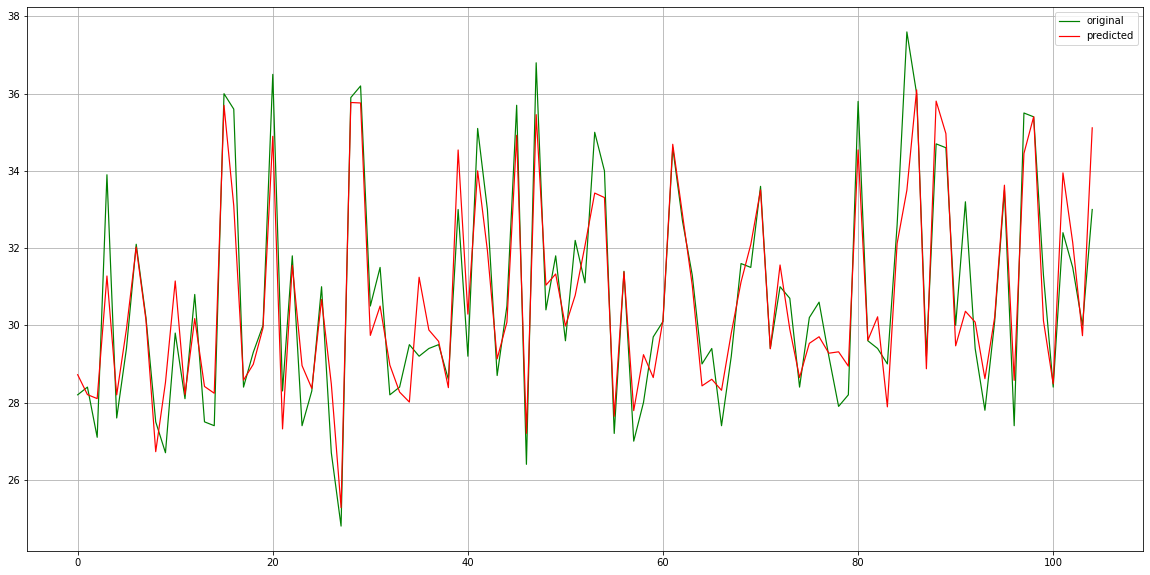

In [109]:
fig,ax=plt.subplots(figsize=(20,10))
x_ax=range(len(x_test))
plt.plot(x_ax,y_test,lw=1.2,color="green",label="original")
plt.plot(x_ax,y_pred,lw=1.2,color="red",label="predicted")
plt.legend()
plt.grid()
plt.show()

In [110]:
#train score of Lasso Regression Model
train_score=round(Lasso.score(x_train,y_train)*100,2)
print("Train score of LASSO REGRESSION: ",train_score)
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred)*100,2)
print("r_2 score:",score)
print("Lasso Score:",round(Lasso.score(x_test,y_test)*100,2))

Train score of LASSO REGRESSION:  80.74
r_2 score: 86.88
Lasso Score: 86.88


In [111]:
#3rd Algorithm ->Ridge
#importing model
from sklearn.linear_model import Ridge

In [112]:
R=Ridge()
#fitting variables into the model(Linear Regression)
R.fit(x_train,y_train)

Ridge()

In [113]:
y_pred=R.predict(x_test)

In [114]:
#checking error 
from sklearn import metrics
print("Mean Absolute Error on Test Data of Ridge Regression:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error on Test Data of Ridge Regression:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error on Test Data of Ridge Regression:",metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error on Test Data of Ridge Regression: 0.6086267256060309
Mean Squared Error on Test Data of Ridge Regression: 0.6407231854642712
Root Mean Squared Error on Test Data of Ridge Regression: 0.6407231854642712


In [115]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Variance':y_test-y_pred})
df1.head()

,Actual,Predicted,Variance
520,28.2,28.374589,-0.174589
517,28.4,28.307513,0.092487
354,27.1,27.447834,-0.347834
244,33.9,32.198196,1.701804
318,27.6,27.722475,-0.122475


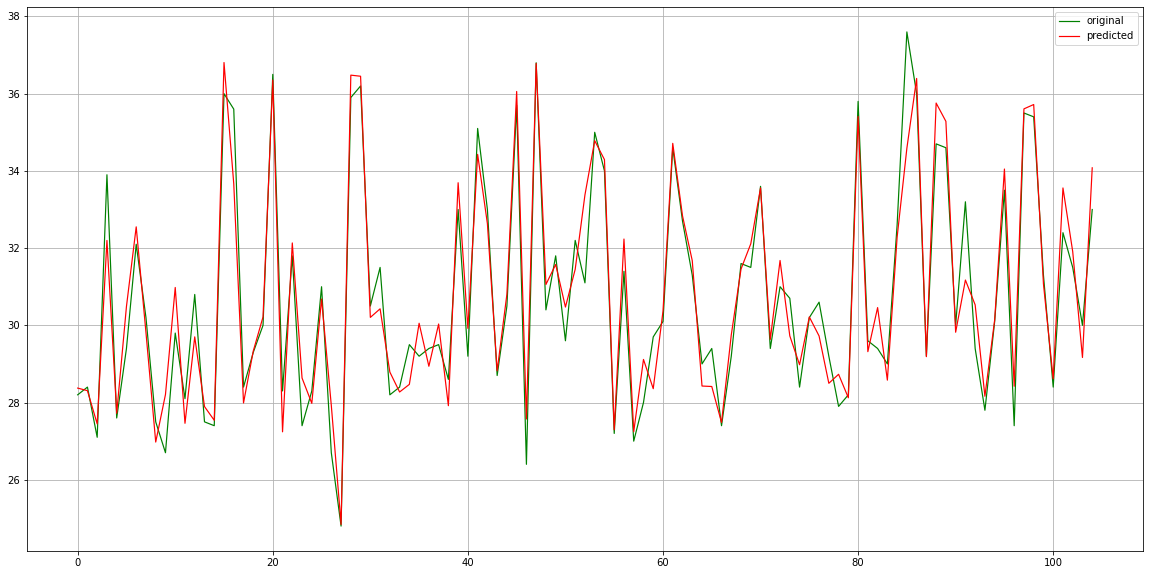

In [116]:
fig,ax=plt.subplots(figsize=(20,10))
x_ax=range(len(x_test))
plt.plot(x_ax,y_test,lw=1.2,color="green",label="original")
plt.plot(x_ax,y_pred,lw=1.2,color="red",label="predicted")
plt.legend()
plt.grid()
plt.show()

In [117]:
#train score of Ridge Regression Model
train_score=round(R.score(x_train,y_train)*100,2)
print("Train score of Ridge REGRESSION: ",train_score)
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred)*100,2)
print("r_2 score:",score)
print("Rigde Score:",round(R.score(x_test,y_test)*100,2))

Train score of Ridge REGRESSION:  86.39
r_2 score: 92.08
Rigde Score: 92.08


In [118]:
#4th Algorithm 
#importing 
from sklearn.linear_model import ElasticNet


In [119]:
E=ElasticNet()

In [120]:
#fitting variables into the model(Linear Regression)
E.fit(x_train,y_train)

ElasticNet()

In [121]:
y_pred=E.predict(x_test)

In [122]:
#checking error 
from sklearn import metrics
print("Mean Absolute Error on Test Data of ElasticNet Regression:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error on Test Data of ElasticNet Regression:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error on Test Data of ElasticNet Regression:",metrics.mean_squared_error(y_test,y_pred))


Mean Absolute Error on Test Data of ElasticNet Regression: 0.7458423862473821
Mean Squared Error on Test Data of ElasticNet Regression: 0.991086701596761
Root Mean Squared Error on Test Data of ElasticNet Regression: 0.991086701596761


In [123]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Variance':y_test-y_pred})
df1.head()

,Actual,Predicted,Variance
520,28.2,28.697141,-0.497141
517,28.4,28.229309,0.170691
354,27.1,27.820515,-0.720515
244,33.9,31.334408,2.565592
318,27.6,28.162062,-0.562062


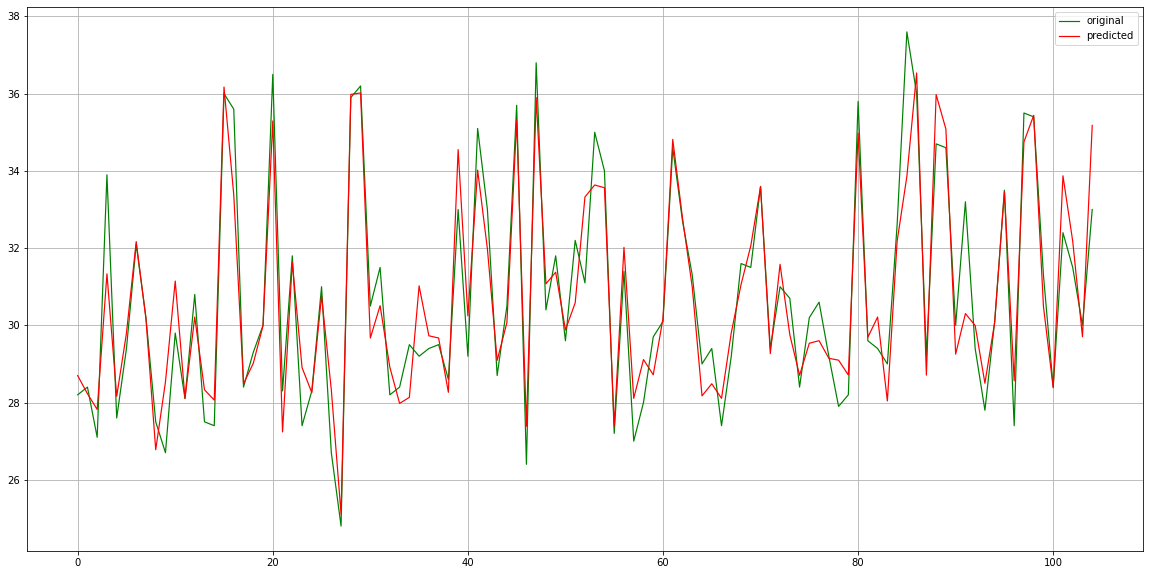

In [124]:
fig,ax=plt.subplots(figsize=(20,10))
x_ax=range(len(x_test))
plt.plot(x_ax,y_test,lw=1.2,color="green",label="original")
plt.plot(x_ax,y_pred,lw=1.2,color="red",label="predicted")
plt.legend()
plt.grid()
plt.show()

In [125]:
#train score of Elastic Regression Model
train_score=round(E.score(x_train,y_train)*100,2)
print("Train score of Elastic REGRESSION: ",train_score)
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred)*100,2)
print("r_2 score:",score)
print("Elastic Score",round(E.score(x_test,y_test)*100,2))

Train score of Elastic REGRESSION:  82.15
r_2 score: 87.75
Elastic Score 87.75


In [86]:
#from above ML-Algorithms ,we conclude that RIGDE REGRESSION 92.04 best accuracy..